In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
col_names = ['pregnancy_cnt'
             ,'plasma_glucose_conc'
             ,'diastolic_blood_pressure_mmHg'
             ,'tricep_skin_fold_thickness_mm'
             ,'serum_insulin_2hr_muU_ml'
             ,'bmi'
             ,'diabetes_pedigree_function'
             ,'age_yrs'
            ,'label']
pima_indian_diabetes_df = pd.read_csv("/home/kidconnect/Projects/Data/pima-indians-diabetes.csv",names=col_names,header=None)

In [6]:
pima_indian_diabetes_df

,pregnancy_cnt,plasma_glucose_conc,diastolic_blood_pressure_mmHg,tricep_skin_fold_thickness_mm,serum_insulin_2hr_muU_ml,bmi,diabetes_pedigree_function,age_yrs,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
sns.set()

/home/kidconnect/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/kidconnect/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/kidconnect/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/kidconnect/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/home/kidconnect/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/home/kidconnect/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1200: R

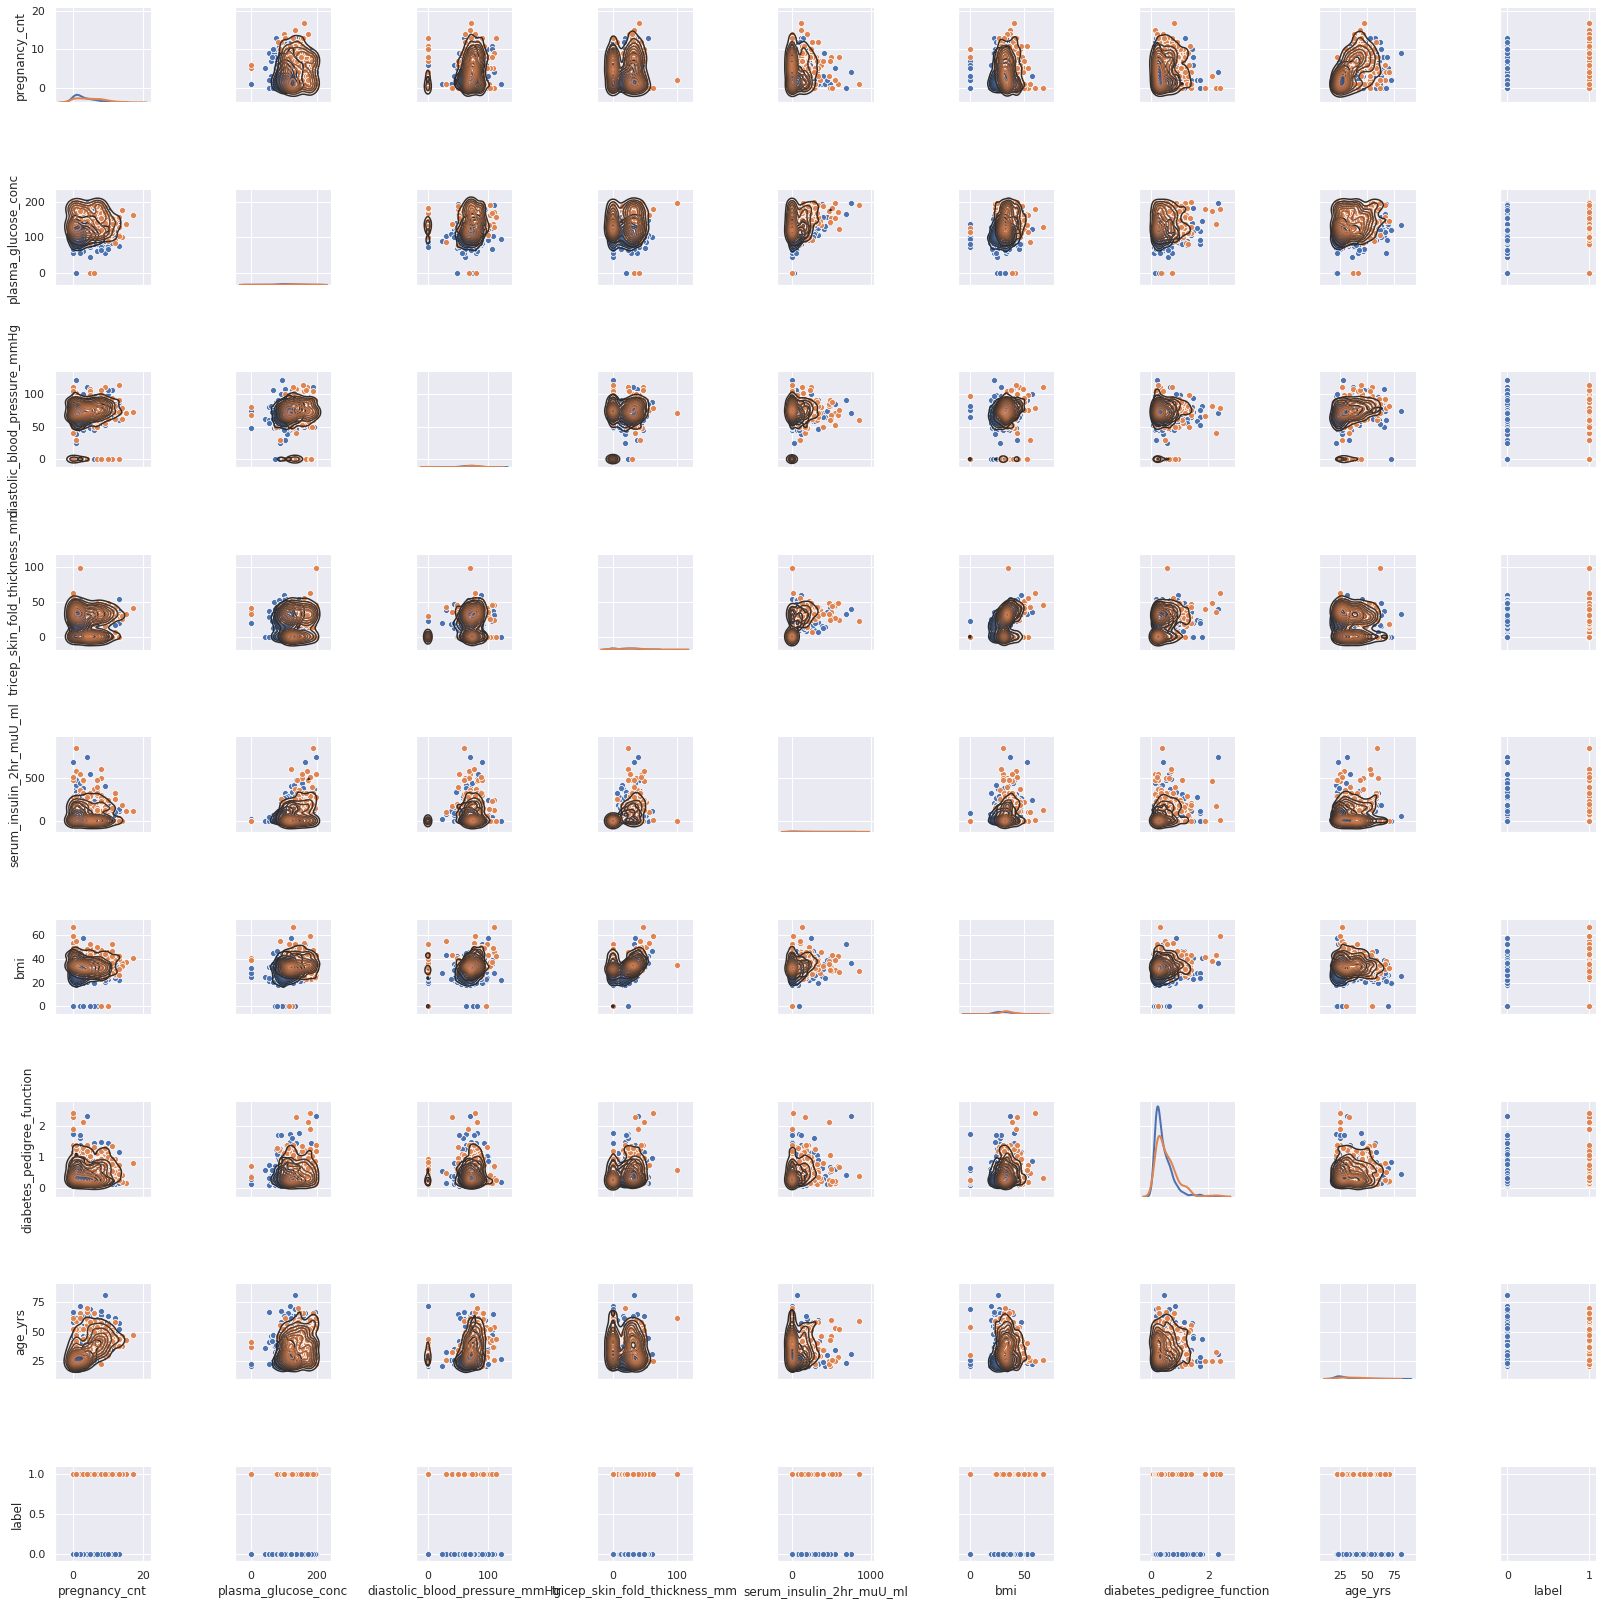

In [15]:
g = sns.PairGrid(pima_indian_diabetes_df,hue='label')
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.scatterplot)
g = g.map_upper(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=2)

In [18]:
#drop problematic features
# consider collinearity, ethics
pima_indian_diabetes_df = pima_indian_diabetes_df.drop(columns=['bmi','pregnancy_cnt'])

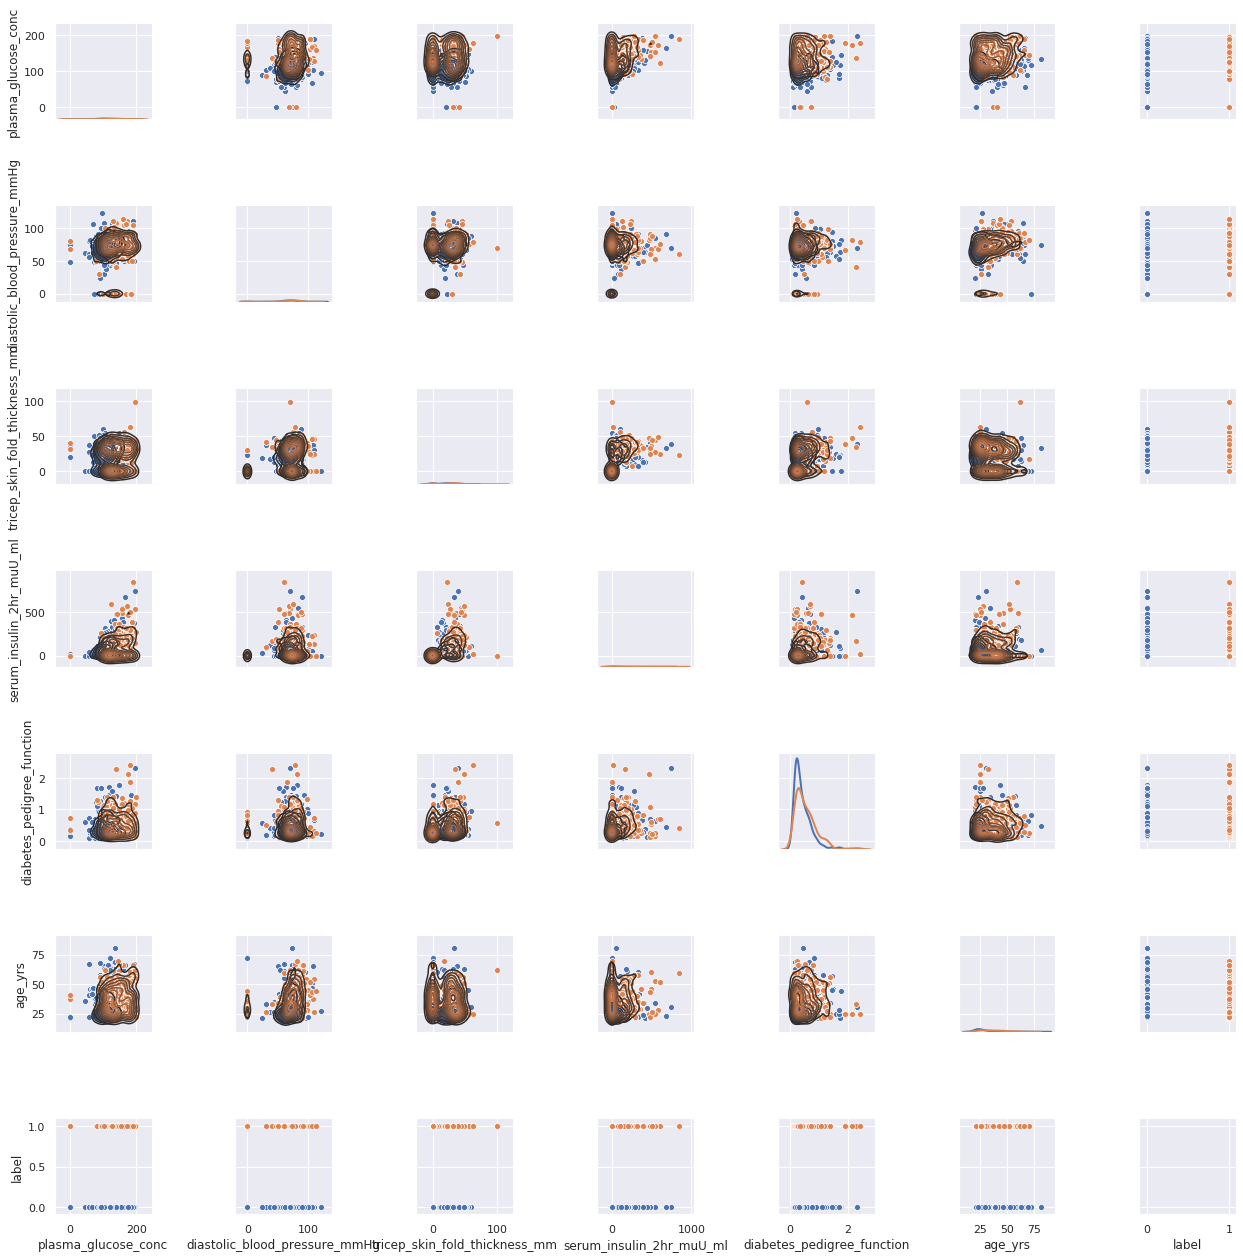

In [19]:
g = sns.PairGrid(pima_indian_diabetes_df,hue='label')
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.scatterplot)
g = g.map_upper(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=2)

In [20]:
pima_indian_diabetes_df.label.value_counts()

0    500
1    268
Name: label, dtype: int64

In [21]:
# Downsamplin' time
# Separate majority and minority classes
df_majority = pima_indian_diabetes_df[pima_indian_diabetes_df['label']==0]
df_minority = pima_indian_diabetes_df[pima_indian_diabetes_df['label']==1]

In [24]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results

In [29]:
# Combine minority class with downsampled majority class
driverset = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
driverset.label.value_counts()

1    268
0    268
Name: label, dtype: int64

In [28]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

In [30]:
X, y = min_max_scaler.fit_transform(driverset.drop(columns=['label'])), driverset['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
clf_model = LogisticRegression().fit(X_train,y_train)


/home/kidconnect/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
scikit_score = clf_model.score(X_test,y_test)
print('Scikit score: ', scikit_score)

Scikit score:  0.7391304347826086


In [35]:
scikit_score = clf_model.score(X_train,y_train)
print('Scikit score: ', scikit_score)

Scikit score:  0.736
